In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# 支持中文
# 就是那个文件的文件名，记得对照大小写
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

In [3]:
import scipy.io as sio

## 数据集

In [4]:
#读取mat文件，读取到的是map类型
mat_data = sio.loadmat("data/ex7data2.mat")
type(mat_data)

dict

In [5]:
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [6]:
# 存的一些版本信息
mat_data["__header__"], mat_data["__version__"], mat_data["__globals__"]

(b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '1.0',
 [])

In [7]:
X = mat_data["X"]
type(X), X.shape

(numpy.ndarray, (300, 2))

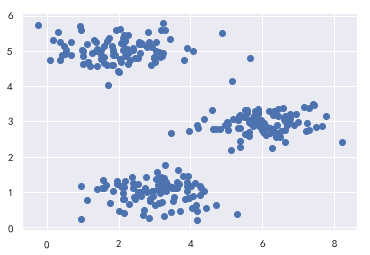

In [8]:
# 眼看着应该是三类
plt.scatter(X[:,0], X[:,1])

## 手写K-Means

K-means算法的思想就是对空间K个点为中心进行聚类，对靠近他们的对象进行归类，通过迭代的方法，逐次更新聚类中心(质心)的值，直到得到最好的聚类结果。K-means过程：

1.	首先选择k个类别的中心点
2.	对任意一个样本，求其到各类中心的距离，将该样本归到距离最短的中心所在的类
3.	聚好类后，重新计算每个聚类的中心点位置
4.	重复2,3步骤迭代，直到k个类中心点的位置不变，或者达到一定的迭代次数，则迭代结束，否则继续迭代


In [9]:
class MyKMeans():
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
        self.clustercenters = None # 集群中心的点坐标
        self.labels_ = None # 每个点的类别
        
    def fit(self, X, max_iter=1000):
        if X.shape[0] < self.n_clusters:
            raise Exception("样本太少")
        
        clustercenters = self.get_init_clustercenters(X)
        num_iter = 1
        while True:
            # 到各个中心点的距离，这里没开根号，只比较大小就无所谓开根号了
            distances = np.hstack([np.sum((X - center)**2, axis=1).reshape(-1,1) for center in clustercenters])       
            labels = distances.argmin(axis=1) # 每个点所属类别，是根据上面的clustercenters划分出来的
            # 在这里判断保证最后clustercenters和labels对应
            if num_iter >= max_iter:
                break
            new_clustercenters = np.array([X[labels==label].mean(axis=0) for label in range(clustercenters.shape[0])])
            if np.all(clustercenters == new_clustercenters):
                break                        
            clustercenters = new_clustercenters
            num_iter += 1
        print("num_iter:%d" % num_iter)
        self.clustercenters = clustercenters
        self.labels_ = labels
            
    def get_init_clustercenters(self, X):
        # 不放回抽样
        return X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

In [10]:
np.random.choice(np.arange(100,200), 3)

array([145, 144, 128])

In [11]:
# 默认是有放回的抽样
np.random.choice(5, 4)

array([2, 1, 0, 4])

In [12]:
X[np.random.choice(X.shape[0], 3, replace=False)]

array([[4.72372078, 0.62044136],
       [5.37293912, 2.81684776],
       [3.03084301, 5.24057582]])

In [13]:
[center  for center in X[np.random.choice(X.shape[0], 3, replace=False)]]

[array([2.61036396, 0.88027602]),
 array([1.40597916, 5.06636822]),
 array([2.61428678, 5.22287414])]

In [14]:
np.array([center  for center in X[np.random.choice(X.shape[0], 3, replace=False)]])

array([[6.78110732, 3.05676866],
       [3.91596068, 1.01225774],
       [3.56478625, 1.11764714]])

In [15]:
X[:5], X[:5].argmax(axis=1)

(array([[1.84207953, 4.6075716 ],
        [5.65858312, 4.79996405],
        [6.35257892, 3.2908545 ],
        [2.90401653, 4.61220411],
        [3.23197916, 4.93989405]]), array([1, 0, 0, 1, 1], dtype=int64))

num_iter:3


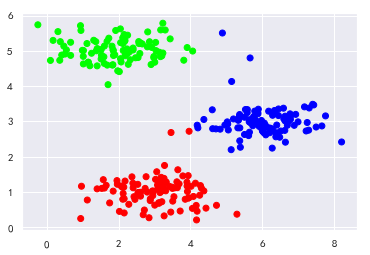

In [16]:
myKMeans = MyKMeans()
myKMeans.fit(X, max_iter=1000)
y_predict = myKMeans.labels_

plt.scatter( X[:,0], X[:,1], c=pd.Series(y_predict).map({0:"#ff0000",1:"#00ff00",2:"#0000ff"}) )

## 使用sklearn

In [17]:
from sklearn.cluster import KMeans

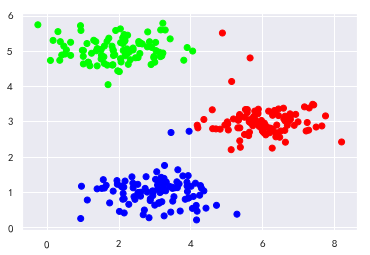

In [18]:
kMeans = KMeans(n_clusters=3)
kMeans.fit(X)

plt.scatter( X[:,0], X[:,1], c=pd.Series(kMeans.labels_).map({0:"#ff0000",1:"#00ff00",2:"#0000ff"}) )